## Deep Learning and Computer Vision

### Encoder-Decoder - Transposed Convolutions

Shani Israelov

Jean Monnet University, 2023

The aim of this exercise is to code a convolution auto-encoder to create digit images.
You will use the MNIST dataset.

1/ Create and train a simple convolutional auto-encoder with :
- 3 encoding convolutional layers with max pooling after the two first conv. layers
- 1 dense layer (embedding space)
- 1 dense layer (49 neurons)
- Reshape (7 x7)
- 3 decoding transposed convolutional layers (use "strides" for upsampling)
- 1 convolutional layer (sigmoid function as activation)
The loss function is the mean square error between the input and the output (0.01 would be not too
bad for the validation set).

In [1]:
from keras.models import Model
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, Conv2DTranspose
from keras.optimizers import adam_v2
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

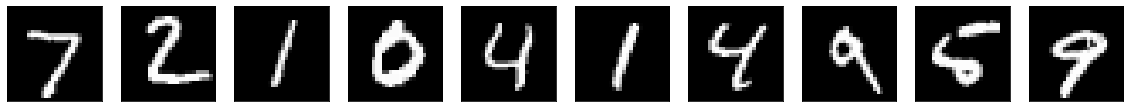

In [2]:
import matplotlib.pyplot as plt

n = 10  # how many records we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [3]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:

model = Sequential([
    # Encoding
    Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(49, activation='relu'),
    Reshape((7,7,1)),
    # Decoding
    Conv2DTranspose(64, (3, 3), strides = 2, activation='relu', padding='same'),
    Conv2DTranspose(64, (3, 3), strides = 2, activation='relu', padding='same'),
    Conv2DTranspose(32, (3, 3), activation='relu', padding='same'),
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])


In [5]:
# Declare the model
model.compile(loss = 'mse',
              optimizer = adam_v2.Adam()
             )

In [6]:
# Train the model
model.fit(x_train, x_train,
                epochs=5,
                batch_size=16,
                shuffle=True,
                verbose=1,
                validation_data=(x_test, x_test)
               )

Epoch 1/5
3750/3750 [==============================] - 25s 5ms/step - loss: 0.0329 - val_loss: 0.0225
Epoch 2/5
3750/3750 [==============================] - 20s 5ms/step - loss: 0.0206 - val_loss: 0.0184
Epoch 3/5
3750/3750 [==============================] - 20s 5ms/step - loss: 0.0184 - val_loss: 0.0176
Epoch 4/5
3750/3750 [==============================] - 20s 5ms/step - loss: 0.0174 - val_loss: 0.0168
Epoch 5/5
3750/3750 [==============================] - 19s 5ms/step - loss: 0.0167 - val_loss: 0.0159


2/ Observe the quality of the output for some test images.


In [7]:
decoded_imgs = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


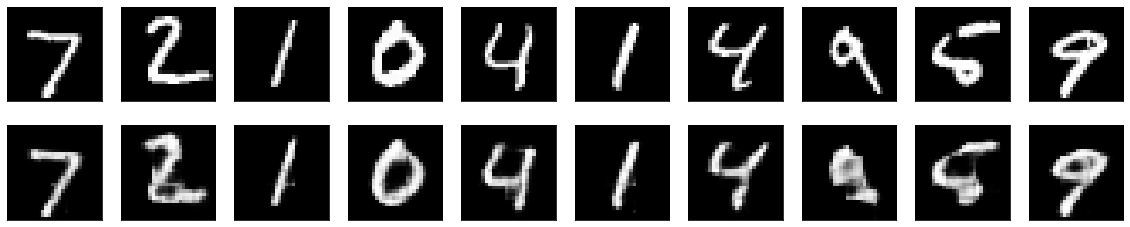

In [8]:

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

3/ Encode two images from two different digits. Compute the average of two 49-D vectors in the
latent space. Decode this average. Compare with the average of the two decoded images.

In [9]:
from keras import Model 
model_encode = Model(inputs=model.input, outputs=model.layers[7].output)
y_pred_encode = model_encode.predict(x_train)
model_decode = Model(inputs=model.layers[8].input, outputs=model.output)
y_pred_decode = model_decode.predict(y_pred_encode)

1875/1875 [==============================] - 3s 2ms/step


In [10]:
y_pred_encode.shape

(60000, 49)

In [11]:
i = 100
j = 120
avg_encode = (y_pred_encode[i]+y_pred_encode[j])/2
print("avg_encod",avg_encode.shape)
img_decoded = (y_pred_decode[i]+y_pred_decode[j])/2
print("avg_decode",img_decoded.shape)



avg_encod (49,)
avg_decode (28, 28, 1)


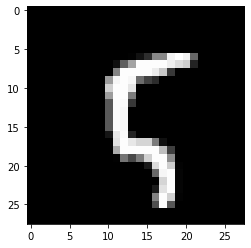

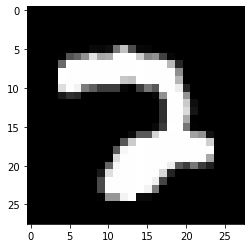

In [12]:
import matplotlib.pyplot as plt

i = 100
j = 120

plt.figure(figsize=(20, 4))
# display original
plt.imshow(x_train[i].reshape(28, 28))
plt.gray()

plt.figure(figsize=(20, 4))
# display reconstruction
plt.imshow(x_train[j].reshape(28, 28))
plt.gray()


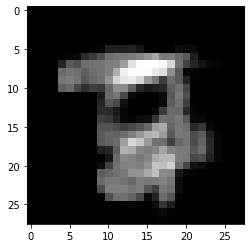

In [13]:

plt.figure(figsize=(20, 4))
# display reconstruction
plt.imshow(img_decoded)
plt.gray()

4/ Transform your auto-encoder into a denoising network.

In [14]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0,
scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0,
scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)



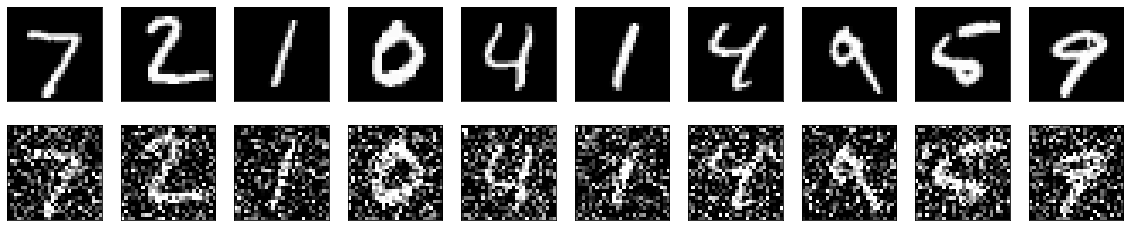

In [15]:

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noisy
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [16]:
model_noisy = Sequential([
    # Encoding
    Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(49, activation='relu'),
    Reshape((7,7,1)),
    # Decoding
    Conv2DTranspose(64, (3, 3), strides = 2, activation='relu', padding='same'),
    Conv2DTranspose(64, (3, 3), strides = 2, activation='relu', padding='same'),
    Conv2DTranspose(32, (3, 3), activation='relu', padding='same'),
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

In [18]:
# Declare the model
model_noisy.compile(loss = 'mse',
              optimizer = adam_v2.Adam()
             )

In [19]:
# Train the model
model_noisy.fit(x_train_noisy, x_train,
                epochs=5,
                batch_size=16,
                shuffle=True,
                verbose=1,
                validation_data=(x_test_noisy, x_test)
               )

Epoch 1/5
3750/3750 [==============================] - 20s 5ms/step - loss: 0.0498 - val_loss: 0.0406
Epoch 2/5
3750/3750 [==============================] - 20s 5ms/step - loss: 0.0394 - val_loss: 0.0378
Epoch 3/5
3750/3750 [==============================] - 20s 5ms/step - loss: 0.0373 - val_loss: 0.0364
Epoch 4/5
3750/3750 [==============================] - 20s 5ms/step - loss: 0.0360 - val_loss: 0.0359
Epoch 5/5
3750/3750 [==============================] - 21s 5ms/step - loss: 0.0352 - val_loss: 0.0346


In [20]:
decoded_noisy_imgs = model_noisy.predict(x_test_noisy)

313/313 [==============================] - 1s 3ms/step


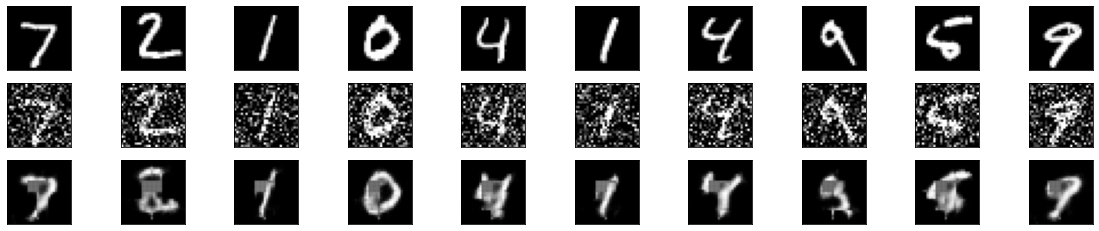

In [23]:

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noisy
    ax = plt.subplot(3, n, i+1+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display decoded
    ax = plt.subplot(3, n, i+1+2*n)
    plt.imshow(decoded_noisy_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

#### References: 

[1] Class code

[2] https://towardsdatascience.com/convolutional-autoencoders-for-image-noise-reduction-32fce9fc1763
